In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('clean_dataset_stem.csv',sep=';')

In [3]:
dataset.shape

(396, 10)

In [4]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,komentar,label,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,<username> Simulasi indonesia kembali dijajah ...,negatif,simulasi indonesia kembali dijajah keturunan ...,"['simulasi', 'indonesia', 'kembali', 'dijajah'...","['simulasi', 'indonesia', 'kembali', 'dijajah'...",simulasi indonesia kembali dijajah keturunan b...,simulasi indonesia kembali dijajah keturunan b...,simulasi indonesia jajah turun belanda depan b...
1,1,1,<username> <username> <username> keturunan lai...,negatif,keturunan lain yang gak main bola emang bis...,"['keturunan', 'lain', 'yang', 'gak', 'main', '...","['keturunan', 'lain', 'yang', 'gak', 'main', '...",keturunan lain yang gak main bola emang bisa d...,keturunan lain yang gak main bola emang bisa d...,turun yang gak main bola emang di naturalisasi...
2,2,2,<username> <username> uda botak keturunan penj...,negatif,uda botak keturunan penjajah sok si paling p...,"['uda', 'botak', 'keturunan', 'penjajah', 'sok...","['uda', 'botak', 'keturunan', 'penjajah', 'sok...",uda botak keturunan penjajah sok si paling pah...,uda botak keturunan penjajah sok si paling pah...,uda botak turun jajah sok si paling paham bola...
3,3,3,"<username> <username> <username> Belum tentu, ...",negatif,belum tentu gak semuanya jadi pemain bola d...,"['belum', 'tentu', 'gak', 'semuanya', 'jadi', ...","['belum', 'tentu', 'gak', 'semuanya', 'jadi', ...",belum tentu gak semuanya jadi pemain bola dan ...,belum tentu gak semuanya jadi pemain bola dan ...,gak semua jadi main bola yg milih karir main b...
4,4,4,<username> <username> <username> Lu nya aja yg...,negatif,lu nya aja yg bego makanya nonton sendiri t...,"['lu', 'nya', 'aja', 'yg', 'bego', 'makanya', ...","['lu', 'nya', 'aja', 'yg', 'bego', 'makanya', ...",lu nya aja yg bego makanya nonton sendiri tolo...,lu nya aja yg bego makanya nonton sendiri tolo...,lu aja bego makanya nonton sendiri tolol perse...
5,5,5,<username> Saya punya saran kepada <username> ...,negatif,saya punya saran kepada kita terkenal deng...,"['saya', 'punya', 'saran', 'kepada', 'kita', '...","['saya', 'punya', 'saran', 'kepada', 'kita', '...",saya punya saran kepada kita terkenal dengan p...,saya punya saran kepada kita terkenal dengan p...,punya saran kenal pola main cepat itu hilang i...
6,6,6,Ini STY ga coba asnawi jadi gelandang aja? VO2...,negatif,ini sty ga coba asnawi jadi gelandang aja vo m...,"['ini', 'sty', 'ga', 'coba', 'asnawi', 'jadi',...","['ini', 'sty', 'ga', 'coba', 'asnawi', 'jadi',...",ini sty ga coba asnawi jadi gelandang aja vo m...,ini sty ga coba asnawi jadi gelandang aja vo m...,sty ga coba asnawi jadi gelandang aja vo max p...
7,7,7,<username> <username> <username> Bukan masalah...,negatif,bukan masalah bnyak kesempatan tiap taun ju...,"['bukan', 'masalah', 'bnyak', 'kesempatan', 't...","['bukan', 'masalah', 'bnyak', 'kesempatan', 't...",bukan masalah bnyak kesempatan tiap taun juga ...,bukan masalah bnyak kesempatan tiap taun juga ...,bukan masalah bnyak sempat tiap taun bnyak tur...
8,8,8,"<username> Biasa, sty klo tantrum kan gtu. Sem...",negatif,biasa sty klo tantrum kan gtu semua hal dibaw...,"['biasa', 'sty', 'klo', 'tantrum', 'kan', 'gtu...","['biasa', 'sty', 'klo', 'tantrum', 'kan', 'gtu...",biasa sty klo tantrum kan gtu semua hal dibawa...,biasa sty klo tantrum kan gtu semua hal dibawa...,biasa sty klo tantrum kan gtu semua bawa mna g...
9,9,9,<username> Setelah pulang ke tanah air apakah ...,negatif,setelah pulang ke tanah air apakah akan dilem...,"['setelah', 'pulang', 'ke', 'tanah', 'air', 'a...","['setelah', 'pulang', 'ke', 'tanah', 'air', 'a...",setelah pulang ke tanah air apakah akan dilemp...,setelah pulang ke tanah air apakah akan dilemp...,pulang tanah air akan lempari telur layak timn...


In [5]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [7]:
dataset_label = dataset['label']

In [8]:
dataset_feature

0      simulasi indonesia jajah turun belanda depan b...
1      turun yang gak main bola emang di naturalisasi...
2      uda botak turun jajah sok si paling paham bola...
3      gak semua jadi main bola yg milih karir main b...
4      lu aja bego makanya nonton sendiri tolol perse...
                             ...                        
391    thun llu gk naturalisasi mgkin msih trauma sam...
392    tahun lalu indonesia memang ga gencar buat nat...
393    naturalisasi main turun jadi langkah efektif h...
394    semua syarat perlu proses naturalisasi moga th...
395    mau percaya sama akmal aja udah aneh dulu pas ...
Name: ProcessedText, Length: 396, dtype: object

In [9]:
dataset_label

0      negatif
1      negatif
2      negatif
3      negatif
4      negatif
        ...   
391    positif
392    positif
393    positif
394    positif
395    positif
Name: label, Length: 396, dtype: object

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# Ubah label menjadi angka
dataset["label_numerik"] = dataset["label"].map({"positif": 1, "negatif": 0})

C:\Users\ASUS TUFF\AppData\Local\Temp\ipykernel_21384\105560606.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["label_numerik"], label=f'target, skew: {dataset["label_numerik"].skew():.2f}')


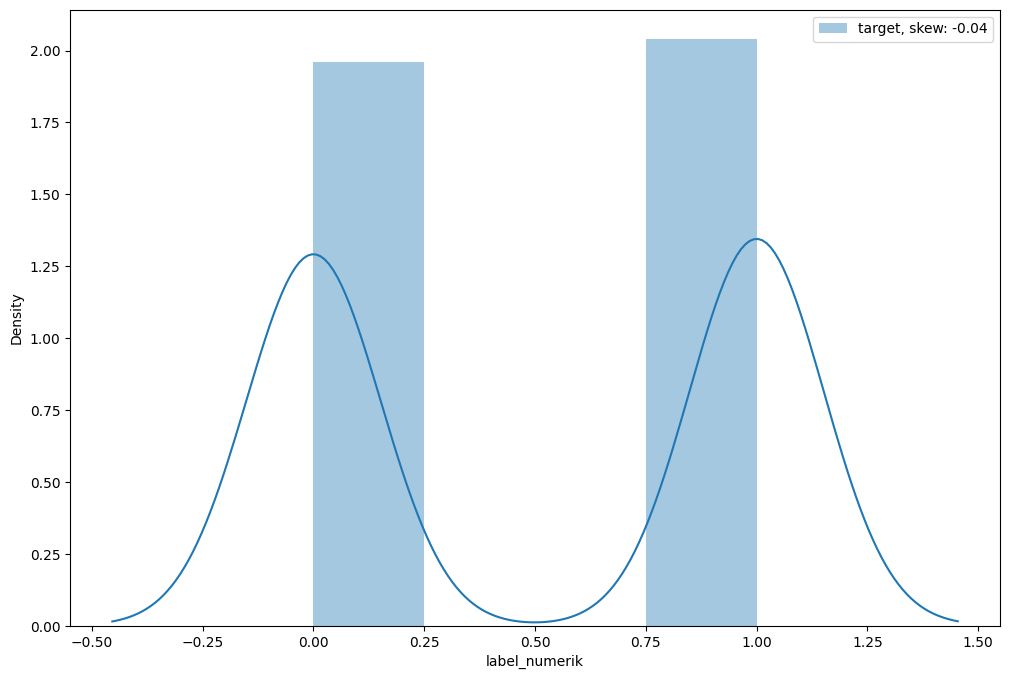

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(dataset["label_numerik"], label=f'target, skew: {dataset["label_numerik"].skew():.2f}')
plt.legend(loc='best')
plt.show()


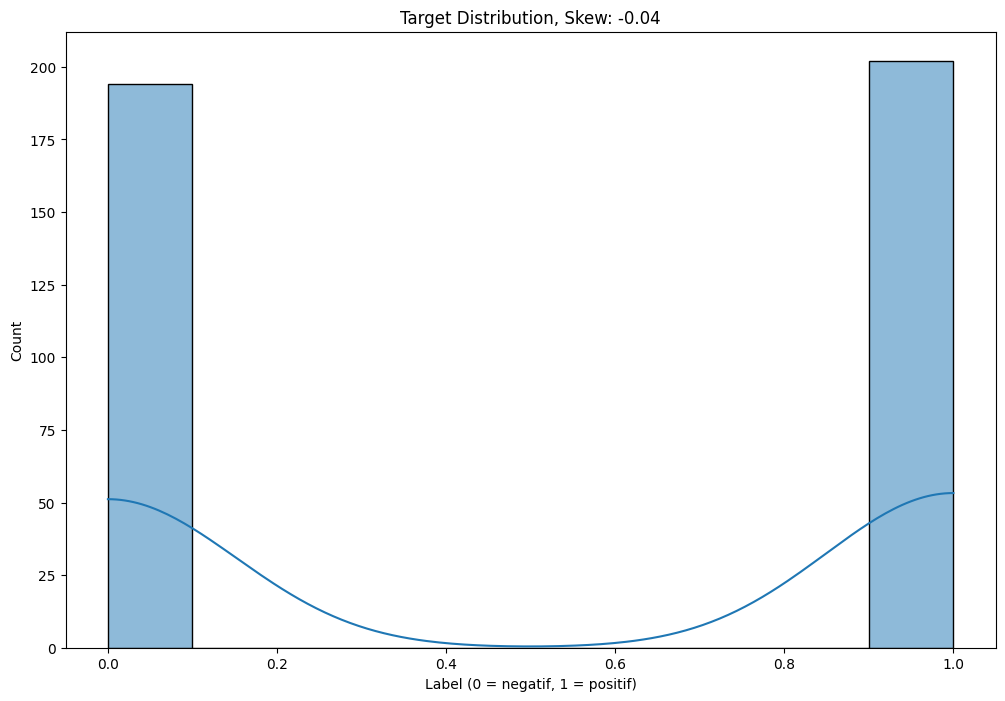

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(dataset["label_numerik"], kde=True)
plt.xlabel("Label (0 = negatif, 1 = positif)")
plt.title(f'Target Distribution, Skew: {dataset["label_numerik"].skew():.2f}')
plt.show()

In [15]:
dataset_label.value_counts()

label
positif    202
negatif    194
Name: count, dtype: int64

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer()

In [18]:
X = vectorizer.fit_transform(dataset_feature)

In [19]:
print(vectorizer.get_feature_names_out())


['abad' 'abis' 'abord' ... 'zaman' 'zerbi' 'zidane']


In [20]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [22]:
X2 = vectorizer2.fit_transform(dataset_feature)

In [23]:
print(vectorizer2.get_feature_names_out())

['abad ga' 'abis putra' 'abord aja' ... 'zaman lewat' 'zerbi butuh'
 'zidane hasil']


In [24]:
print(X2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
corpus = [
    'This is the first Document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [26]:
vectorizer = CountVectorizer()

In [27]:
Z = vectorizer.fit_transform(corpus)

In [28]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [29]:
print(Z.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [30]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [31]:
Z2 = vectorizer2.fit_transform(corpus)

In [32]:
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [33]:
print(Z2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]
